# Pepper Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all Library

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [1]:
# If you use google colabe
import zipfile

zip_path = "dataset.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1731 images belonging to 2 classes.


In [5]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.8076262  0.76056737 0.76056737]
  [0.8115476  0.76448876 0.76448876]
  [0.8193209  0.7722621  0.7722621 ]
  ...
  [0.76855516 0.7136532  0.70973164]
  [0.78787374 0.7329718  0.7290502 ]
  [0.8036323  0.74873036 0.7448088 ]]

 [[0.79600614 0.7489473  0.7489473 ]
  [0.80370635 0.7566475  0.7566475 ]
  [0.8115501  0.7644912  0.7644912 ]
  ...
  [0.78003645 0.7251345  0.7212129 ]
  [0.7918673  0.7369653  0.73304373]
  [0.80748385 0.7525819  0.7486603 ]]

 [[0.7923739  0.7453151  0.7453151 ]
  [0.8000025  0.7529437  0.7529437 ]
  [0.8077733  0.7607145  0.7607145 ]
  ...
  [0.7880205  0.73311853 0.72919697]
  [0.79586303 0.7409611  0.7370395 ]
  [0.8038489  0.74894696 0.7450254 ]]

 ...

 [[0.8777201  0.8306613  0.8306613 ]
  [0.85083807 0.80377924 0.80377924]
  [0.8434868  0.7964279  0.7964279 ]
  ...
  [0.80007124 0.7451693  0.7334046 ]
  [0.8002142  0.7453122  0.73354745]
  [0.8079155  0.75301355 0.74124885]]

 [[0.86566186 0.81860304 0.81860304]
  [0.85040647 0.80334765 0.80334765]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 246 images belonging to 2 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 498 images belonging to 2 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.78045696 0.70594716 0.6902609 ]
  [0.804867   0.73130256 0.7156163 ]
  [0.80603856 0.7354503  0.71976405]
  ...
  [0.7803922  0.7254902  0.72156864]
  [0.7808009  0.7258989  0.72197735]
  [0.78138065 0.7264787  0.7225571 ]]

 [[0.7758186  0.7013088  0.6856225 ]
  [0.80428725 0.73014295 0.7144567 ]
  [0.80719817 0.73660994 0.72092366]
  ...
  [0.7840996  0.72919756 0.725276  ]
  [0.78650725 0.7316053  0.7276837 ]
  [0.7899861  0.7350841  0.73116255]]

 [[0.7720357  0.69718367 0.68201077]
  [0.8022079  0.7276981  0.7120118 ]
  [0.8075859  0.73674035 0.7210541 ]
  ...
  [0.80629927 0.7513973  0.74747574]
  [0.8101006  0.7551986  0.751277  ]
  [0.8141593  0.75925726 0.7553357 ]]

 ...

 [[0.74929714 0.6904736  0.6787089 ]
  [0.74407893 0.6852554  0.6734907 ]
  [0.743235   0.68441147 0.67264676]
  ...
  [0.7968504  0.7419484  0.73802686]
  [0.8089143  0.75401235 0.7500908 ]
  [0.82745105 0.7725491  0.7686275 ]]

 [[0.764986   0.70616245 0.69439775]
  [0.76962435 0.7108008  0.6990361 ]


## Building the Model

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,682 (717.51 KB)

 Trainable params: 183,682 (717.51 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
#Bach Size of training data set
1731/32

54.09375

In [15]:
#Bach Size of Val data set
246/32

7.6875

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=54,#Bach Size of training data set
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=7,
    verbose=1,
    epochs=15,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 574ms/step - accuracy: 0.6424 - loss: 0.6568 - val_accuracy: 0.6161 - val_loss: 0.6413
Epoch 2/15
 1/54 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.5312 - loss: 0.6829

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.5312 - loss: 0.6829 - val_accuracy: 0.6384 - val_loss: 0.6470
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 743ms/step - accuracy: 0.7375 - loss: 0.6237 - val_accuracy: 0.8571 - val_loss: 0.5269
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8750 - loss: 0.4846 - val_accuracy: 0.8571 - val_loss: 0.5187
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 508ms/step - accuracy: 0.8699 - loss: 0.4107 - val_accuracy: 0.9152 - val_loss: 0.2143
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 1.0000 - loss: 0.1205 - val_accuracy: 0.8661 - val_loss: 0.3032
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 507ms/step - accuracy: 0.8844 - loss: 0.3053 - val_accuracy: 0.9777 - val_loss: 0.0700
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8750 - loss: 0.2728 - val_accuracy: 0.9777 - val_loss: 0.0660
Epoch 9/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 559ms/step - accuracy: 0.9553 - loss: 0.1600 - val_accuracy: 0.9554 - val_

In [17]:
scores = model.evaluate(test_generator)

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 458ms/step - accuracy: 0.9957 - loss: 0.0246


In [18]:
scores

[0.023200318217277527, 0.9959839582443237]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [19]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [20]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 54}

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [22]:
type(history.history['loss'])

list

In [23]:
len(history.history['loss'])

15

In [24]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.6362207531929016,
 0.6829268932342529,
 0.6177015900611877,
 0.4846235513687134,
 0.35072705149650574]

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
val_acc

[0.6160714030265808,
 0.6383928656578064,
 0.8571428656578064,
 0.8571428656578064,
 0.9151785969734192,
 0.8660714030265808,
 0.9776785969734192,
 0.9776785969734192,
 0.9553571343421936,
 0.9732142686843872,
 0.9642857313156128,
 0.9732142686843872,
 0.9910714030265808,
 1.0,
 0.9866071343421936]

In [27]:
acc

[0.6550912261009216,
 0.53125,
 0.756915807723999,
 0.875,
 0.8769864439964294,
 1.0,
 0.9152442812919617,
 0.875,
 0.9629193544387817,
 1.0,
 0.9741024374961853,
 0.9375,
 0.9870511889457703,
 0.9375,
 0.9905827045440674]

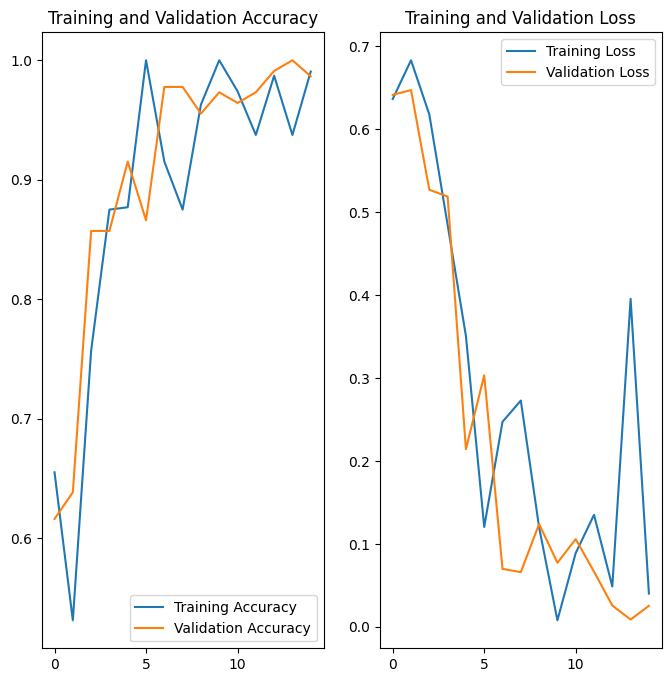

In [28]:
EPOCHS = 15

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Pepper__bell___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
predicted label: Pepper__bell___healthy


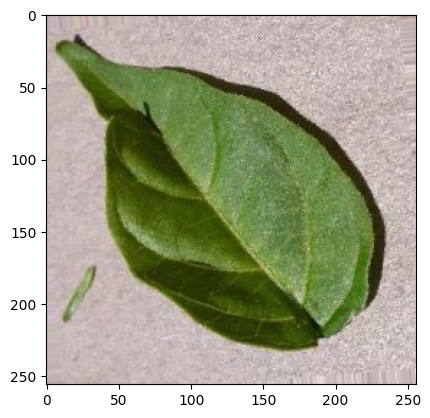

In [31]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0]) # Changed labels_batch to label_batch

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

### Write a function for inference

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


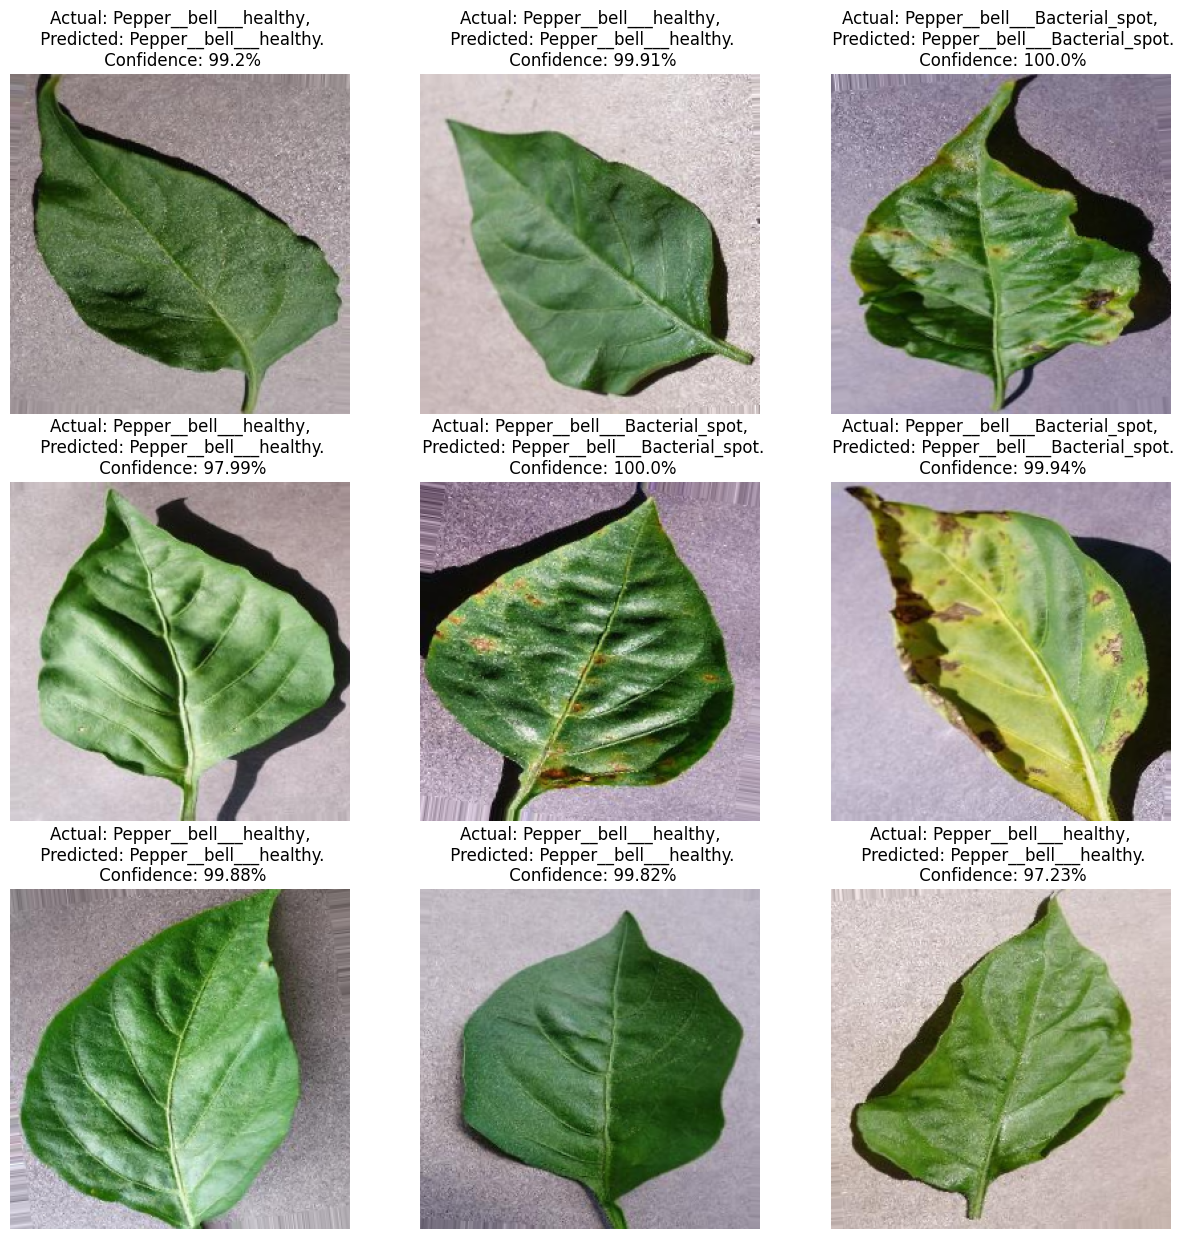

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [36]:
model.save("Peppers.h5")